In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('../dataset/diagnosed_cbc_data_v4.csv')
print("Nombre d'individus : ", df.shape[0])

Nombre d'individus :  1281


### Suppression du diagnosis "Other microcytic anemia" et "Leukemia with thrombocytopenia"

In [84]:
delete = ["Other microcytic anemia", "Leukemia with thrombocytopenia"]
df = df[~df['Diagnosis'].isin(delete)]
print("Nombre d'individus : ", df.shape[0])

Nombre d'individus :  1211


### Suppression des variables bruitées

In [85]:
print(df.tail(5))

       WBC    LYMp   NEUTp     LYMn    NEUTn   RBC   HGB      HCT   MCV   MCH  \
1276  4.40  25.845  77.511  1.88076  5.14094  4.86  13.5  46.1526  80.7  27.7   
1277  5.60  25.845  77.511  1.88076  5.14094  4.85  15.0  46.1526  91.7  31.0   
1278  9.20  25.845  77.511  1.88076  5.14094  4.47  13.1  46.1526  88.7  29.3   
1279  6.48  25.845  77.511  1.88076  5.14094  4.75  13.2  46.1526  86.7  27.9   
1280  8.80  25.845  77.511  1.88076  5.14094  4.95  15.2  46.1526  89.7  30.6   

      MCHC    PLT        PDW      PCT Diagnosis  
1276  34.4  180.0  14.312512  0.26028   Healthy  
1277  33.8  215.0  14.312512  0.26028   Healthy  
1278  33.0  329.0  14.312512  0.26028   Healthy  
1279  32.1  174.0  14.312512  0.26028   Healthy  
1280  34.2  279.0  14.312512  0.26028   Healthy  



A partir d'une certaine ligne, tous les individus ont les mêmes valeurs pour les variables suivantes : LYMn, LYMp, NEUTp, NEUTn, HCT, PDW et PCT

In [86]:
delete = ["LYMn", "LYMp", "NEUTp", "NEUTn", "HCT", "PDW", "PCT"]
df = df.drop(columns=delete)

### Suppression des individus aberrants

In [87]:
from scipy import stats

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]

df = df.drop(df[df['MCH'] > 50].index)

print("Nombre d'individus : ", df.shape[0])

Nombre d'individus :  1163


### Export 7 diagnosis

In [88]:
df.to_csv("../dataset/data_7diagnosis.csv", index=False)

### Suppression des diagnosis sous représentés 


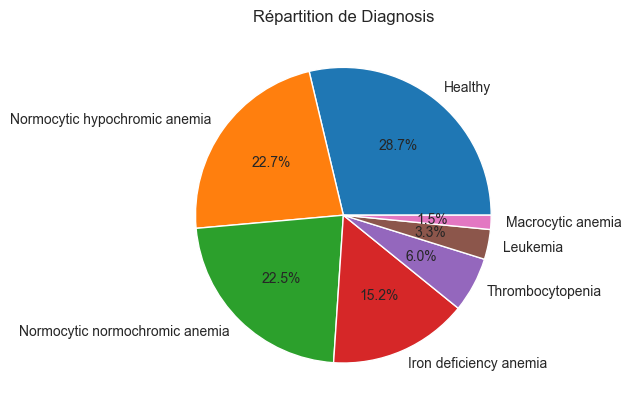

In [89]:
plt.pie(df['Diagnosis'].value_counts(), labels=df['Diagnosis'].value_counts().index, autopct='%1.1f%%')
plt.title('Répartition de Diagnosis')
plt.show()

In [90]:
delete = ["Macrocytic anemia", "Leukemia"]
df = df[~df['Diagnosis'].isin(delete)]
df.to_csv("../dataset/data_5diagnosis.csv", index=False)
print("Nombre d'individus : ", df.shape[0])

Nombre d'individus :  1107


### Export 5 Diagnosis

In [91]:
df.to_csv("../dataset/data_cleaned.csv", index=False)